## Import libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Define output folder to store data

In [2]:
output_path="/home1/datahome/jmartine/models/nemo/tests/MY_ICE_CANAL/EXP00/init/"
# output_path="/home/jmartine/github/CANAL_nemo/EXP00/init/"

### Grid

Number of gridpoints; note that the additional x gridpoint is used as a boundary, while the 3 extra y gridpoints are for boundaries and to make sure the center of the domain falls on top of a tracer gridpoint.

In [3]:
ngrid_x = 501
ngrid_y = 253

Grids $\delta x$ and $\delta y$

In [4]:
δx=2
δy=2

In [5]:
x=np.linspace(0,ngrid_x*δx,ngrid_x)
y=np.linspace(0,ngrid_y*δy,ngrid_y)

In [13]:
grid_ones = np.ones((1,ngrid_y,ngrid_x))

In [14]:
noise_2_add = np.zeros(grid_ones.shape)
scale=0.2

In [19]:
# Sea ice thickness [m]
grid_ones = np.ones((1,ngrid_y,ngrid_x))
ds_hti = 2 * grid_ones  

# Snow thickness [m]
ds_hts = grid_ones * 0

# Sea ice fraction [-]
ds_ati = 0.5 * grid_ones 

# Sea ice salinity
ds_smi = grid_ones * (6.3 )

# Sea ice internal temperature (-5°C)
ds_tmi = grid_ones * (273.15 - ( 5 ))

# Sea ice surface temperature [-3°C]
ds_tsu = grid_ones * (273.15 - ( 3 ))

In [20]:
ds_ice=xr.Dataset(coords=dict(x=(["x"], x),y=(["y"], y)))

ds_ice['hti']=(('time','y','x'),ds_hti)
ds_ice['hts']=(('time','y','x'),ds_hts)
ds_ice['ati']=(('time','y','x'),ds_ati)
ds_ice['smi']=(('time','y','x'),ds_smi)
ds_ice['tmi']=(('time','y','x'),ds_tmi)
ds_ice['tsu']=(('time','y','x'),ds_tsu)

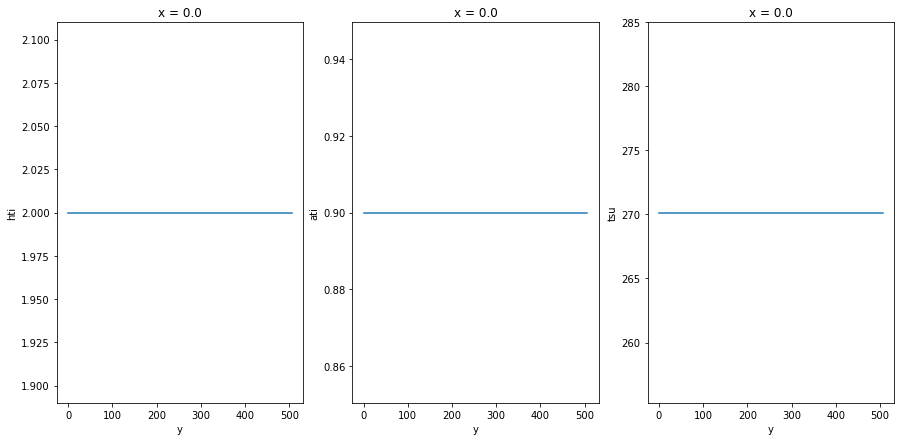

In [21]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,7))

ds_ice.hti.isel({'x':0,'time':0}).plot(ax=ax1)
ds_ice.ati.isel({'x':0,'time':0}).plot(ax=ax2)
ds_ice.tsu.isel({'x':0,'time':0}).plot(ax=ax3)

In [22]:
ds_ice.to_netcdf(output_path+'Channel_Ice_init_smooth_tanh_new_grid_HR_IC_05_may_init_max_ice.nc',unlimited_dims={'time':True})